Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: colorspace

Loading required package: khroma

Loading required package: ggplot2

Loading required package: ggpattern

Loading required package: reshape2

Loading required package: tidyverse

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package 

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

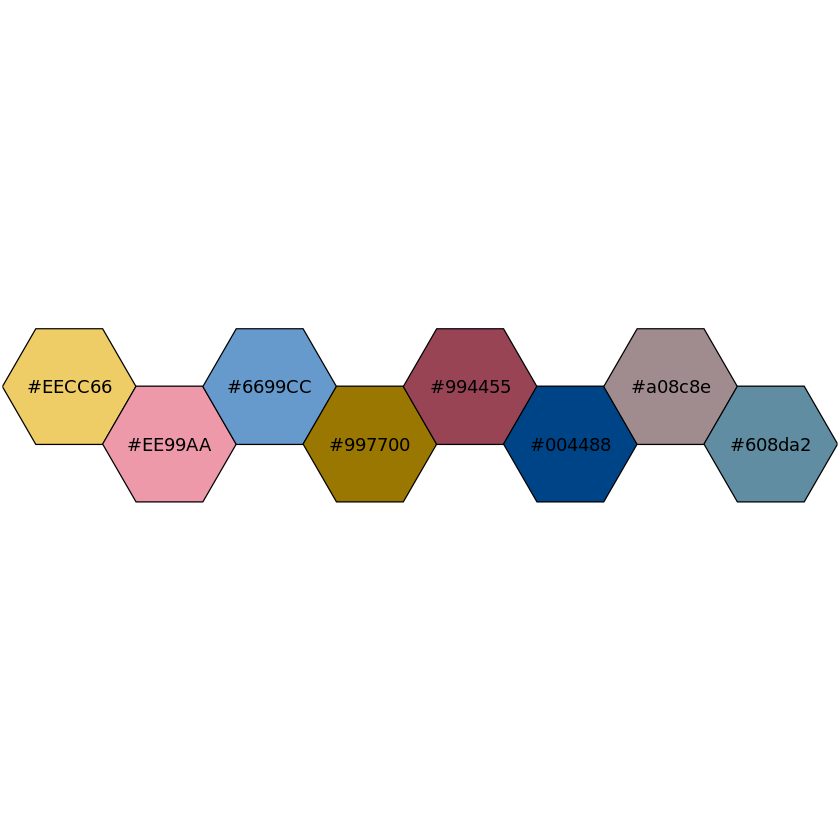

In [1]:
f_func <- "../functions.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_func, '--to=script', '--stdout'), stdout = TRUE)))
f_path <- "../dirs.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_path, '--to=script', '--stdout'), stdout = TRUE)))
f_cols <- "../cols.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_cols, '--to=script', '--stdout'), stdout = TRUE)))

In [2]:
LOSD_genus_table_withNoise <- readRDS(paste0(INT_LOSD, "LOSD_genus_table_withNoise.Rdata"))
LOSD_species_table_withNoise <- readRDS(paste0(INT_LOSD, "LOSD_species_table_withNoise.Rdata"))

In [5]:
suppl10_plot_LOSD = LOSD_withNoise <- list()
for (j in 1:2){
    LOSD_withNoise[[j]] <- list(LOSD_species_table_withNoise, LOSD_genus_table_withNoise)[[j]] %>% 
        as.data.frame(.) %>% 
        melt(id.vars = colnames(.)[!grepl(colnames(.), pattern = "LOSD")], value.name = "LOSD", variable.name = "control_set") %>%
        mutate(M_reads = as.numeric(gsub(control_set, pattern = "[^0-9.-]+", replacement = ""))) %>% 
        select(-strain) %>% 
        mutate(sample = ifelse(grepl(control_set, pattern = "_Bctrls"), yes = 'BAL ss-cfDNA', 
                        ifelse(grepl(control_set, pattern = "_Pctrls"), yes = 'plasma ss-cfDNA', NA))) %>% 
        mutate(sample = factor(sample, levels = c('plasma ss-cfDNA', 'BAL ss-cfDNA'))) %>% 
        group_by(LOSD, db, threshold, sample, M_reads) %>% 
        summarise(n = n(), .groups = "keep") %>% 
        mutate(MPM = factor(LOSD, levels = rev(c(0.25,0.5,1,2,4,8,16,32,64,128,256,512,1024,2048,4096,">4096")))) %>% 
        mutate(db = ifelse(db == "EPRSc2", yes = "cRE.21", no = as.character(db))) %>% 
        mutate(db = ifelse(db == "EPRSFv64MCAspDM", yes = "dREM.260", no = as.character(db)))
    if (j == 1){LOSD_withNoise[[j]] <- LOSD_withNoise[[j]] %>% filter(db == "cRE.21") %>% filter(threshold == "0.4")}
    if (j == 2){LOSD_withNoise[[j]] <- LOSD_withNoise[[j]] %>% filter(db == "dREM.260") %>% filter(threshold == "0.9")}        

    suppl10_plot_LOSD[[j]] <- LOSD_withNoise[[j]] %>% 
        filter(M_reads %in% c(10,25,40,55,70,85,100)) %>% 
        ggplot(aes(x = M_reads, y = n, fill = MPM)) + 
            geom_bar(stat = "identity", size = 0.5) +
            scale_fill_manual(drop = FALSE, na.value = "black", 
                              breaks = rev(c(0.25,0.5,1,2,4,8,16,32,64,128,256,512,1024,2048,4096,">4096")), 
                              values = c(colors_mc[7], browns(5)[1:4], reds(7)[2:7], blues(6)[1:5])) + 
            guides(color = guide_legend(override.aes = list(fill = NA)),
            linetype = guide_legend(override.aes = list(fill = NA))) +
            scale_x_continuous(breaks=c(10,25,40,55,70,85,100), labels = c(10,25,40,55,70,85,100)) +
            scale_y_continuous(breaks=c(0,seq(5, 55, 5))) +
            theme_bw() + theme(legend.key = element_rect(fill = "white"),
                                axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
            ylab("Aspergillus simulations") + 
            facet_grid(cols = vars(sample), rows = vars(db), scale = "free") + xlab("million reads/sample") + 
            labs(fill = "minimal MPM", col = " ") + 
            ggtitle(label = c("LoSD species level", "LoSD genus level")[j])

}

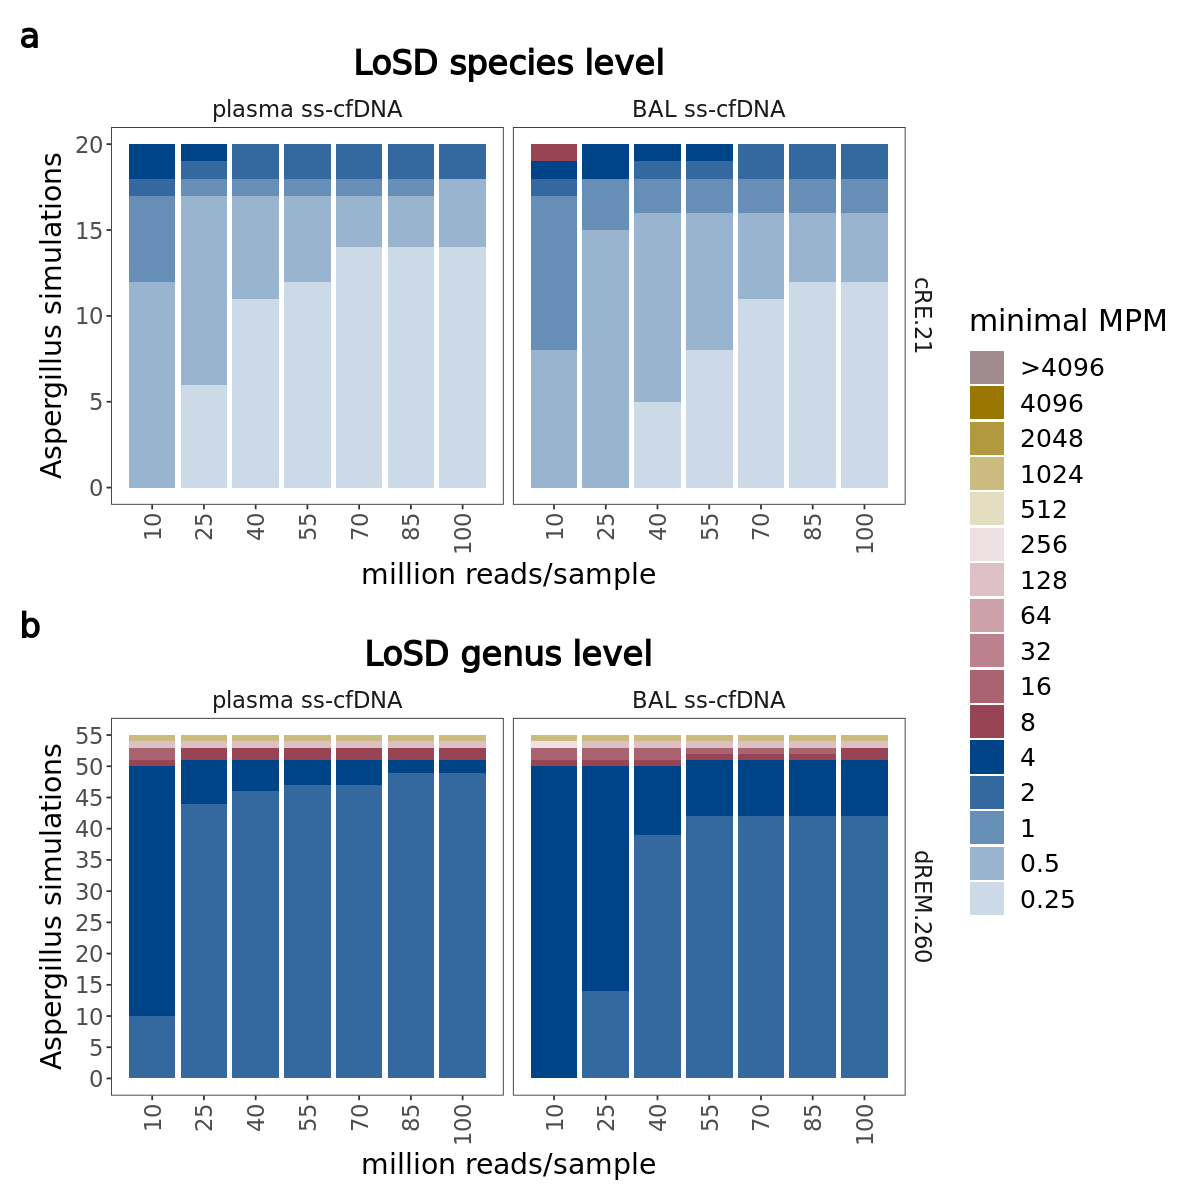

In [6]:
options(repr.plot.width=10, repr.plot.height=10)
SuplFig10 <- 
    (suppl10_plot_LOSD[[1]] + guides(fill = "none")) + 
    (suppl10_plot_LOSD[[2]]) + 
        plot_layout(guides = "collect", ncol = 1) & 
        plot_annotation(tag_levels = 'a') &
        theme_bw() &
        theme(legend.position='right', legend.justification='right', legend.direction = 'vertical',
            axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),
            legend.key.size = unit(0.75, 'cm'), legend.key.height = unit(0.75, 'cm'), legend.key.width = unit(0.75, 'cm'), 
            text = element_text(size = 17), 
            legend.title = element_text(size = 18), legend.text = element_text(size = 15, colour = "black"),
            plot.title = element_text(size = 20, hjust = 0.5, face = "bold"), 
            plot.subtitle = element_text(size = 17, hjust = 0.5), 
            plot.tag = element_text(face = 'bold', size = 20),  
            strip.background = element_blank(), 
            panel.grid.major = element_blank(), panel.grid.minor = element_blank())

SuplFig10

ggsave("../../output/suppl_figures/SuplFig10_R.png", 
       SuplFig10, width = 10, height = 10)
ggsave("../../output/suppl_figures/SuplFig10_R.pdf", 
       SuplFig10, width = 10, height = 10)